<h1 style="text-align: center; font-weight: bold;">Sanction List Data Processing</h1>

# 1. Data Loading and Review

In [8]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import unidecode
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ConList.csv', low_memory=False, skiprows=1)

# Preview the first 10 rows
df.head(10)

,Name 6,Name 1,Name 2,Name 3,Name 4,Name 5,Title,Name Non-Latin Script,Non-Latin Script Type,Non-Latin Script Language,DOB,Town of Birth,Country of Birth,Nationality,Passport Number,Passport Details,National Identification Number,National Identification Details,Position,Address 1,Address 2,Address 3,Address 4,Address 5,Address 6,Post/Zip Code,Country,Other Information,Group Type,Alias Type,Alias Quality,Regime,Listed On,UK Sanctions List Date Designated,Last Updated,Group ID
0,MITHOO,Mian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pakistan,Pakistan,NaN,NaN,NaN,NaN,Cleric (“Pir”) of Bharchundi Sharif Shrine,Hafizabad Taluka Daharki,District Ghotki,NaN,NaN,NaN,NaN,NaN,Pakistan,(UK Sanctions List Ref):GHR0086. (UK Statement...,Individual,Primary name variation,NaN,Global Human Rights,09/12/2022,09/12/2022,09/12/2022,15672
1,MITHU,Mian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pakistan,Pakistan,NaN,NaN,NaN,NaN,Cleric (“Pir”) of Bharchundi Sharif Shrine,Hafizabad Taluka Daharki,District Ghotki,NaN,NaN,NaN,NaN,NaN,Pakistan,(UK Sanctions List Ref):GHR0086. (UK Statement...,Individual,Primary name variation,NaN,Global Human Rights,09/12/2022,09/12/2022,09/12/2022,15672
2,MITTO,Mian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pakistan,Pakistan,NaN,NaN,NaN,NaN,Cleric (“Pir”) of Bharchundi Sharif Shrine,Hafizabad Taluka Daharki,District Ghotki,NaN,NaN,NaN,NaN,NaN,Pakistan,(UK Sanctions List Ref):GHR0086. (UK Statement...,Individual,Primary name variation,NaN,Global Human Rights,09/12/2022,09/12/2022,09/12/2022,15672
3,MITTU,Mian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pakistan,Pakistan,NaN,NaN,NaN,NaN,Cleric (“Pir”) of Bharchundi Sharif Shrine,Hafizabad Taluka Daharki,District Ghotki,NaN,NaN,NaN,NaN,NaN,Pakistan,(UK Sanctions List Ref):GHR0086. (UK Statement...,Individual,Primary name variation,NaN,Global Human Rights,09/12/2022,09/12/2022,09/12/2022,15672
4,ZADACHIN,Andrei,Andreevich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22/08/1990,NaN,Russia,Russia,NaN,NaN,NaN,NaN,(1) Investigator for Particularly Important Ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(UK Sanctions List Ref):RUS1831. Financial san...,Individual,Primary name variation,NaN,Russia,21/04/2023,21/04/2023,21/04/2023,15890
5,"""ZAPCHAST TRADE"" LLP",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUILDING 258/4,PROSPECT SUYINBAI,NaN,NaN,NaN,ALMATY,NaN,Kazakhstan,(UK Sanctions List Ref):RUS2305. Financial san...,Entity,Primary name variation,NaN,Russia,07/11/2024,07/11/2024,09/01/2025,16636
6,"""ZAPCHASTRAYD"" LLP",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUILDING 258/4,PROSPECT SUYINBAI,NaN,NaN,NaN,ALMATY,NaN,Kazakhstan,(UK Sanctions List Ref):RUS2305. Financial san...,Entity,Primary name variation,NaN,Russia,07/11/2024,07/11/2024,09/01/2025,16636
7,(GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO Box 21120,NaN,NaN,NaN,Baramkeh,Damascus,NaN,Syria,(UK Sanctions List Ref):SYR0306. (UK Statement...,Entity,AKA,NaN,Syria,02/12/2011,31/12/2020,13/05/2022,12431
8,(GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO Box 5966,Abou Bakr Al Seddeq St.,NaN,NaN,NaN,Damascus,NaN,Syria,(UK Sanctions List Ref):SYR0306. (UK Statement...,Entity,AKA,NaN,Syria,02/12/2011,31/12/2020,13/05/2022,12431
9,(GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PO Box 2849,Al Moutanabi Street,NaN,NaN,NaN,Damascus,NaN,Syria,(UK Sanctions List Ref):SYR0306. (UK Statement...,Entity,AKA,NaN,Syria,02/12/2011,31/12/2020,13/05/2022,12431


# 2.Dataset Exploration 

In [21]:
# Display dataset info
print(f"Dataset shape: {df.shape}")
print("Columns:", df.columns.tolist())

Dataset shape: (18798, 36)
Columns: ['Name 6', 'Name 1', 'Name 2', 'Name 3', 'Name 4', 'Name 5', 'Title', 'Name Non-Latin Script', 'Non-Latin Script Type', 'Non-Latin Script Language', 'DOB', 'Town of Birth', 'Country of Birth', 'Nationality', 'Passport Number', 'Passport Details', 'National Identification Number', 'National Identification Details', 'Position', 'Address 1', 'Address 2', 'Address 3', 'Address 4', 'Address 5', 'Address 6', 'Post/Zip Code', 'Country', 'Other Information', 'Group Type', 'Alias Type', 'Alias Quality', 'Regime', 'Listed On', 'UK Sanctions List Date Designated', 'Last Updated', 'Group ID']


In [22]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18798 entries, 0 to 18797
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Name 6                             18798 non-null  object
 1   Name 1                             12585 non-null  object
 2   Name 2                             7255 non-null   object
 3   Name 3                             1098 non-null   object
 4   Name 4                             254 non-null    object
 5   Name 5                             35 non-null     object
 6   Title                              1058 non-null   object
 7   Name Non-Latin Script              3990 non-null   object
 8   Non-Latin Script Type              1359 non-null   object
 9   Non-Latin Script Language          1497 non-null   object
 10  DOB                                12385 non-null  object
 11  Town of Birth                      9321 non-null   object
 12  Coun

In [23]:
# Summarise missing values
missing_values = df.isnull().mean() * 100
print("\nMissing Values (%):")
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values_sorted)


Missing Values (%):
Name 5                             99.813810
Name 4                             98.648792
Address 4                          95.919779
Title                              94.371742
Name 3                             94.158953
Non-Latin Script Type              92.770508
Non-Latin Script Language          92.036387
National Identification Details    91.855517
Address 5                          91.589531
Address 3                          89.451005
National Identification Number     89.243537
Passport Details                   88.802000
Post/Zip Code                      87.057134
Passport Number                    85.237791
Address 2                          81.317161
Name Non-Latin Script              78.774338
Alias Quality                      74.422811
Address 1                          65.512289
Name 2                             61.405469
Position                           58.921162
Address 6                          54.947335
Town of Birth                     

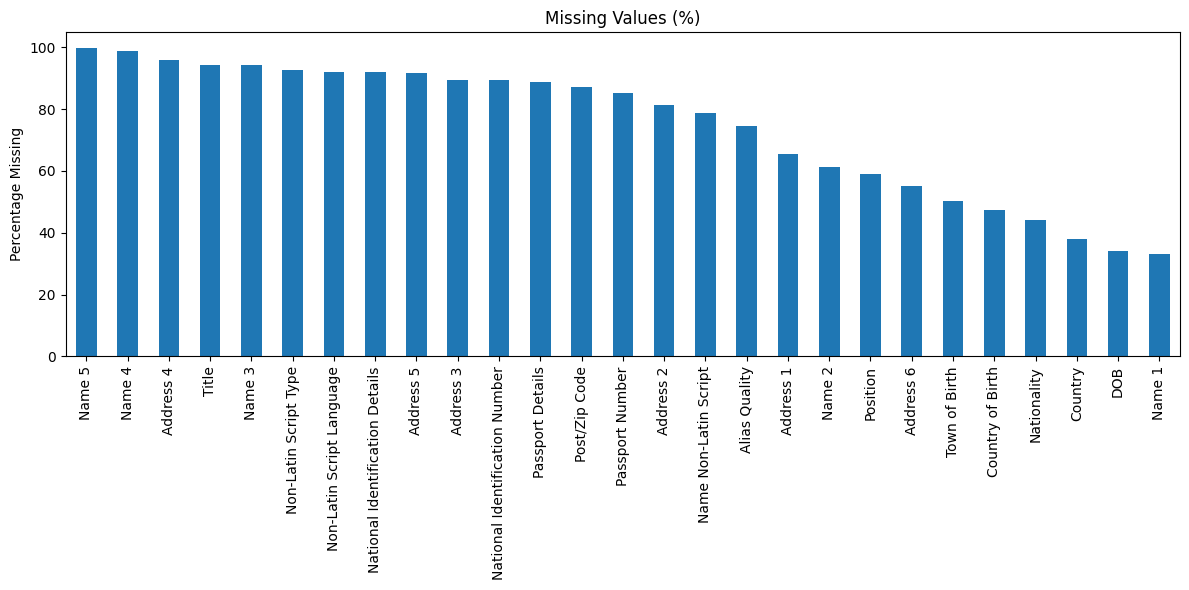

In [24]:
# Visualise missing values
missing_values = df.isnull().mean() * 100
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
missing_values_sorted.plot(kind='bar', title='Missing Values (%)')
plt.ylabel('Percentage Missing')
plt.tight_layout()
plt.show()

# 3.Filter Relevant Records

In [25]:
# Filter for Individuals and Entities (exclude all other Group Types)
df_filtered = df[df['Group Type'].isin(['Individual', 'Entity'])].copy()
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Rows removed (non-Individual/Entity): {len(df) - len(df_filtered)}")

Original dataset shape: (18798, 36)
Filtered dataset shape: (18717, 36)
Rows removed (non-Individual/Entity): 81


In [26]:
# Check unique Group Types
print("\nUnique Group Types:", df_filtered['Group Type'].unique())


Unique Group Types: ['Individual' 'Entity']


In [27]:
# Summarise Group Type distribution
print("\nGroup Type counts:")
print(df_filtered['Group Type'].value_counts())


Group Type counts:
Group Type
Individual    13692
Entity         5025
Name: count, dtype: int64


In [28]:
# Preview filtered data (columns for requirements)
print("\nSample of filtered data:")
print(df_filtered[['Name 6', 'Group Type', 'DOB', 'Nationality', 'Country', 'Group ID']].head(10))


Sample of filtered data:
                                              Name 6  Group Type         DOB  \
0                                             MITHOO  Individual         NaN   
1                                              MITHU  Individual         NaN   
2                                              MITTO  Individual         NaN   
3                                              MITTU  Individual         NaN   
4                                           ZADACHIN  Individual  22/08/1990   
5                               "ZAPCHAST TRADE" LLP      Entity         NaN   
6                                 "ZAPCHASTRAYD" LLP      Entity         NaN   
7  (GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES      Entity         NaN   
8  (GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES      Entity         NaN   
9  (GENERAL) ORGANIZATION FOR ENGINEERING INDUSTRIES      Entity         NaN   

  Nationality     Country  Group ID  
0    Pakistan    Pakistan     15672  
1    Pakistan    

In [29]:
# Check what was removed (if any)
if len(df) != len(df_filtered):
    print("\nSample of removed records:")
    print(df[~df['Group Type'].isin(['Individual', 'Entity'])][['Name 6', 'Group Type', 'Group ID']].head())


Sample of removed records:
                   Name 6 Group Type  Group ID
996                AKTIVA       Ship     13651
1736   ALCHIMIST MARATHON       Ship     13648
1737  ALCHIMIST ROTTERDAM       Ship     13648
3190             AN SAN 1       Ship     13648
3229              ANSAN-1       Ship     13648


# 4.Transform Data

In [31]:
# Define transformation functions
def standardise_text(text):
    # Convert text to title case, remove extra spaces.
    if pd.isna(text):
        return None
    return ' '.join(str(text).strip().title().split())

In [35]:
def standardise_date(date_str):
    # Convert date to YYYY-MM-DD, return None if invalid.
    if pd.isna(date_str):
        return None
    parsed_date = pd.to_datetime(date_str, errors='coerce', dayfirst=True)
    return parsed_date.strftime('%Y-%m-%d') if not pd.isna(parsed_date) else None

In [64]:
def get_primary_name(row):
    # Construct full name for individuals, use Name 6 for entities.
    name1 = standardise_text(row['Name 1'])
    name6 = standardise_text(row['Name 6'])
    if row['Group Type'] == 'Individual':
        # Prefer Name 1 if multi-word, else combine Name 1 and Name 6
        if name1 and len(name1.split()) > 1:
            return name1
        if name1 and name6:
            return f"{name1} {name6}"
        return name1 or name6 or None
    # For entities, use Name 6
    return name6 or None

In [89]:
# Apply transformations to filtered dataset
df_filtered['PrimaryName'] = df_filtered.apply(get_primary_name, axis=1)
df_filtered['DOB'] = df_filtered['DOB'].apply(standardise_date)
df_filtered['Nationality'] = df_filtered['Nationality'].apply(standardise_text)
df_filtered['Country of Birth'] = df_filtered['Country of Birth'].apply(standardise_text)
df_filtered['Current Country'] = df_filtered['Country'].apply(standardise_text)
df_filtered['EntityType'] = df_filtered['Group Type']
df_filtered['SanctionType'] = df_filtered['Regime']
df_filtered['PassportNumber'] = df_filtered['Passport Number']
df_filtered['NationalID'] = df_filtered['National Identification Number']
df_filtered['AliasQuality'] = df_filtered['Alias Quality']
df_filtered['UniqueID'] = df_filtered['Group ID']

C:\Users\ruibi\AppData\Local\Temp\ipykernel_15712\2671543177.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  parsed_date = pd.to_datetime(date_str, errors='coerce', dayfirst=True)


In [90]:
# Select output columns for final dataset
output_cols = [
    'UniqueID', 'EntityType', 'PrimaryName', 'DOB',
    'Nationality', 'Country of Birth', 'Current Country',
    'SanctionType', 'PassportNumber', 'NationalID', 'AliasQuality'
]
df_output = df_filtered[output_cols]

In [91]:
# Preview transformed data
print(f"Transformed dataset shape: {df_output.shape}")
print("\nSample of transformed data:")
print(df_output.head(10))

Transformed dataset shape: (18717, 11)

Sample of transformed data:
   UniqueID  EntityType                                        PrimaryName  \
0     15672  Individual                                        Mian Mithoo   
1     15672  Individual                                         Mian Mithu   
2     15672  Individual                                         Mian Mitto   
3     15672  Individual                                         Mian Mittu   
4     15890  Individual                                    Andrei Zadachin   
5     16636      Entity                               "Zapchast Trade" Llp   
6     16636      Entity                                 "Zapchastrayd" Llp   
7     12431      Entity  (General) Organization For Engineering Industries   
8     12431      Entity  (General) Organization For Engineering Industries   
9     12431      Entity  (General) Organization For Engineering Industries   

          DOB Nationality Country of Birth Current Country  \
0        No

# 5.Handle Duplicates

In [96]:
def aggregate_records(group):
    # Select PrimaryName: prefer multi-word for individuals, first non-null for entities
    primary_names = group['PrimaryName'].dropna()
    if group['EntityType'].iloc[0] == 'Individual':
        # For individuals, prefer multi-word names
        multi_word = primary_names[primary_names.str.split().str.len() > 1]
        primary = multi_word.iloc[0] if not multi_word.empty else primary_names.iloc[0] if not primary_names.empty else None
    else:
        # For entities, take first non-null
        primary = primary_names.iloc[0] if not primary_names.empty else None
    
    # Create Aliases: include all PrimaryNames except the chosen PrimaryName
    aliases = [name for name in group['PrimaryName'] if pd.notna(name) and name != primary]
    aliases = list(set(aliases)) if aliases else None
    
    # Return consolidated record (exclude UniqueID, as it's the group key)
    return pd.Series({
        'EntityType': group['EntityType'].iloc[0],
        'PrimaryName': primary,
        'Aliases': aliases,
        'DOB': group['DOB'].dropna().iloc[0] if not group['DOB'].dropna().empty else None,
        'Nationality': group['Nationality'].dropna().iloc[0] if not group['Nationality'].dropna().empty else None,
        'Country of Birth': group['Country of Birth'].dropna().iloc[0] if not group['Country of Birth'].dropna().empty else None,
        'Current Country': group['Current Country'].dropna().iloc[0] if not group['Current Country'].dropna().empty else None,
        'SanctionType': group['SanctionType'].iloc[0],
        'PassportNumber': group['PassportNumber'].dropna().iloc[0] if not group['PassportNumber'].dropna().empty else None,
        'NationalID': group['NationalID'].dropna().iloc[0] if not group['NationalID'].dropna().empty else None,
        'AliasQuality': group['AliasQuality'].dropna().iloc[0] if not group['AliasQuality'].dropna().empty else None
    })

In [97]:
# Apply deduplication
df_deduped = df_output.groupby('UniqueID').apply(aggregate_records).reset_index()

C:\Users\ruibi\AppData\Local\Temp\ipykernel_15712\2541701164.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_deduped = df_output.groupby('UniqueID').apply(aggregate_records).reset_index()


In [98]:
# Preview deduplicated data
print(f"Deduplicated dataset shape: {df_deduped.shape}")
print("\nSample of deduplicated data:")
print(df_deduped.head(10))

Deduplicated dataset shape: (4673, 12)

Sample of deduplicated data:
   UniqueID  EntityType      PrimaryName  \
0      6894  Individual  Abu Abdurrahman   
1      6895  Individual        Abdul Hai   
2      6897  Individual       Abdul Agha   
3      6899  Individual  Tarwat Abdallah   
4      6901  Individual     Majeed Abdul   
5      6904  Individual       Abdul Baqi   
6      6905  Individual       Abdul Bari   
7      6907  Individual    Mauwin Jabbar   
8      6908  Individual      Abdul Jalil   
9      6909  Individual          A Kabir   

                                             Aliases         DOB  Nationality  \
0  [Fikiruddin Muqti, Abdul Rahman, Mohamad Abdur...  1958-08-17    Indonesia   
1                                               None        None  Afghanistan   
2         [Abdul Saiyid, Saiyid Al-Man, Abdul Manan]        None         None   
3  [Tharwat Shihata, Tharwat Ali, Shahata Thirwat...  1960-06-29        Egypt   
4               [Majid Abdul, Majeed Abdu

In [102]:
def clean_country(text):
    if pd.isna(text):
        return None
    text = str(text).strip()
    # Handle formats like "(1) X (2) X" or "(1) X"
    if text.startswith('('):
        # Split by ')' and take the country name
        parts = text.split(')')
        for part in parts:
            if part.strip() and not part.strip().startswith('('):
                return part.strip()
    # Remove any trailing "(2" or similar
    return text.split('(')[0].strip()

df_deduped['Nationality'] = df_deduped['Nationality'].apply(clean_country)
df_deduped['Country of Birth'] = df_deduped['Country of Birth'].apply(clean_country)
df_deduped['Current Country'] = df_deduped['Current Country'].apply(clean_country)

In [103]:
print(df_deduped.head(10))

   UniqueID  EntityType      PrimaryName  \
0      6894  Individual  Abu Abdurrahman   
1      6895  Individual        Abdul Hai   
2      6897  Individual       Abdul Agha   
3      6899  Individual  Tarwat Abdallah   
4      6901  Individual     Majeed Abdul   
5      6904  Individual       Abdul Baqi   
6      6905  Individual       Abdul Bari   
7      6907  Individual    Mauwin Jabbar   
8      6908  Individual      Abdul Jalil   
9      6909  Individual          A Kabir   

                                             Aliases         DOB  Nationality  \
0  [Fikiruddin Muqti, Abdul Rahman, Mohamad Abdur...  1958-08-17    Indonesia   
1                                               None        None  Afghanistan   
2         [Abdul Saiyid, Saiyid Al-Man, Abdul Manan]        None         None   
3  [Tharwat Shihata, Tharwat Ali, Shahata Thirwat...  1960-06-29        Egypt   
4               [Majid Abdul, Majeed Abdul Chaudhry]  1939-04-15     Pakistan   
5                            

In [105]:
# Save to CSV
df_deduped.to_csv('ConList_Processed.csv', index=False)

# Confirm
print("Dataset saved as 'ConList_Processed.csv'")

Dataset saved as 'ConList_Processed.csv'
